In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from functions.load_data import *
from functions.clean_data import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Training

In [6]:
df = load_diabetes_data()
df_clean = clean_feature_data(df)

In [7]:
numeric_cols     = ['age', 'weight', 'height', 'years_on_job', #'bmi',
                   ]

categorical_cols = ['smoker', 'sex', #'class_of_worker', 'ever_worked', 'more_than_one_job', 
                    'coronary_heart_disease', 'had_high_cholesterol',
                    'family_history_diabetes', 'hypertension', 'heart_condition', 'cancer', 
                    'kidney_condition', 'liver_condition', 
                    # 'cant_afford_meds', 'skipped_meds', 'primary_care', 'non_hispanic_race', 'hispanic','non_hispanic_race',
                   ]

target_col       = ['diabetes']

X = df_clean[numeric_cols+categorical_cols]
y = df_clean[target_col].replace({'YES':1, 'NO':0})

In [8]:
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_dummies = pd.get_dummies(X, columns=categorical_cols, dtype=float)
X_dummies['minority'] = np.where(~df_clean['non_hispanic_race'].isin(['White', 'Primary race not releasable']), 1, 0)
X_dummies.head()

,age,weight,height,years_on_job,smoker_NO,smoker_YES,sex_FEMALE,sex_MALE,coronary_heart_disease_NO,coronary_heart_disease_YES,...,hypertension_YES,heart_condition_NO,heart_condition_YES,cancer_NO,cancer_YES,kidney_condition_NO,kidney_condition_YES,liver_condition_NO,liver_condition_YES,minority
0,0.089552,0.125628,0.411765,0.057143,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,0.865672,0.452261,0.647059,0.714286,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,0.268657,0.628141,0.294118,0.057143,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,0.253731,0.703518,0.352941,0.028571,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,0.029851,0.015075,0.176471,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


In [9]:
sm = SMOTEENN(random_state=42)
X_dummies_res, y_res = sm.fit_resample(X_dummies, y)

# Testing Using 2017 Data

In [12]:
df17 = load_diabetes_data(path='../data/samadult17.csv')
df17_clean = clean_feature_data(df)

X17 = df17_clean[numeric_cols+categorical_cols]
y17 = df17_clean[target_col].replace({'YES':1, 'NO':0})

X17[numeric_cols] = scaler.transform(X17[numeric_cols])

X17_dummies = pd.get_dummies(X17, columns=categorical_cols, dtype=float)
X17_dummies['minority'] = np.where(~df17_clean['non_hispanic_race'].isin(['White', 'Primary race not releasable']), 1, 0)

X17_dummies.head()

,age,weight,height,years_on_job,smoker_NO,smoker_YES,sex_FEMALE,sex_MALE,coronary_heart_disease_NO,coronary_heart_disease_YES,...,hypertension_YES,heart_condition_NO,heart_condition_YES,cancer_NO,cancer_YES,kidney_condition_NO,kidney_condition_YES,liver_condition_NO,liver_condition_YES,minority
0,0.089552,0.125628,0.411765,0.057143,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,0.865672,0.452261,0.647059,0.714286,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
2,0.268657,0.628141,0.294118,0.057143,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,0.253731,0.703518,0.352941,0.028571,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,0.029851,0.015075,0.176471,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0


## XGBoost

In [38]:
model = XGBClassifier(n_jobs=-1, max_depth=10, n_estimators=100)
model.fit(X_dummies_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(X17_dummies)
print("---Development Set Results---")
print("Accuracy: {:.4f}".format(accuracy_score(y17, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y17, y_pred)))

print(classification_report(y17, y_pred))

---Development Set Results---
Accuracy: 0.8924
F1 Score: 0.6435
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     29017
           1       0.50      0.91      0.64      3482

    accuracy                           0.89     32499
   macro avg       0.74      0.90      0.79     32499
weighted avg       0.94      0.89      0.91     32499



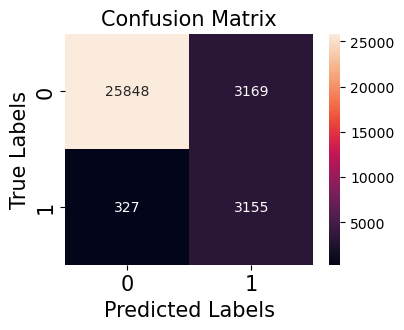

In [40]:
matrix = confusion_matrix(y17,y_pred).round(2)
plt.figure(figsize=(4, 3))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt='.0f')

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);

# Scratch Pad

## Testing - LightGBM

In [29]:
model = LGBMClassifier(max_depth=6, n_estimators= 100, num_leaves=100, n_jobs=-1, verbose = -1,  verbose_eval=False)
model.fit(X_dummies_res, y_res)

LGBMClassifier(max_depth=6, n_jobs=-1, num_leaves=100, verbose=-1,
               verbose_eval=False)

In [30]:
y_pred = model.predict(X17_dummies)
print("---Development Set Results---")
print("Accuracy: {:.4f}".format(accuracy_score(y17, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y17, y_pred)))

print(classification_report(y17, y_pred))

---Development Set Results---
Accuracy: 0.8261
F1 Score: 0.4781
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     29017
           1       0.35      0.74      0.48      3482

    accuracy                           0.83     32499
   macro avg       0.66      0.79      0.69     32499
weighted avg       0.90      0.83      0.85     32499



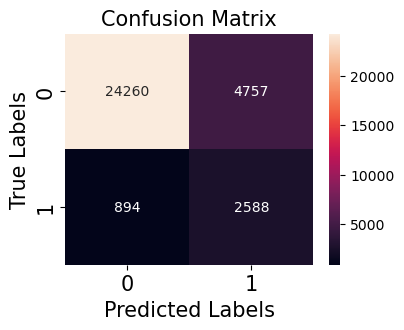

In [33]:
matrix = confusion_matrix(y17,y_pred).round(2)
plt.figure(figsize=(4, 3))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt='.0f')

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);